# Parameter space evaulation

The pressure rise in the downstream section of a GDP rig will be dependent on several factors including: 
- Sample dimensions
- Sample temperature
- Upstream pressure
- Downstream pipe dimentions

However for this case certain paramters will be kept fixed:

In [1]:
sample_diameter = 20e-03 # m
downstream_pipe_diameter = 5e-03 # m
downstream_pipe_length = 2 # m

With these parameters fixed, the sample temperature and upstream can be varied over a potential range, based on simialr rigs seen in the literature:

$$450 < T(\mathrm{K}) < 750$$

$$10^{2} < P_{\mathrm{up}}(\mathrm{Pa}) < 10^{5}$$


The data for this parametric study can be obtained by running the script:

`python3 festim_scripts.py`

From this one can investigate how the range of sample temperatures and upstream pressures will influence the pressure levels in the downstream. 

## Varying upstream pressure

First the influence of the upstream pressure can be investigated by considering a case where the temperature is constant at $T=700K$, varying the upstream pressure.

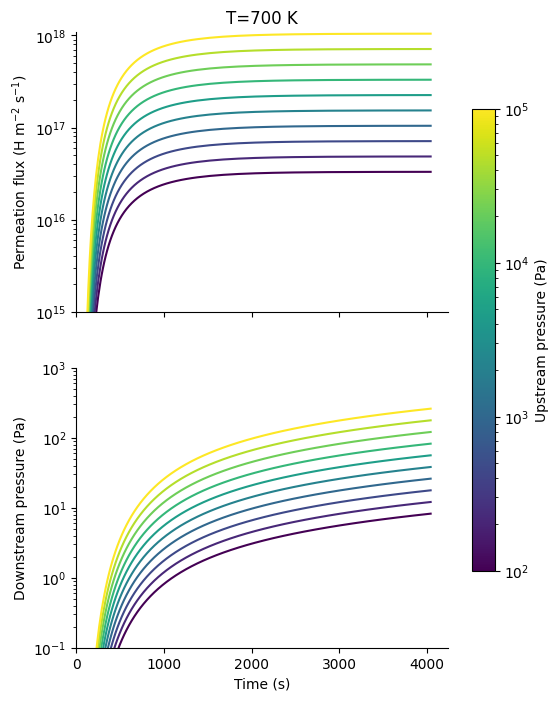

In [2]:
import numpy as np
from festim_scripts import test_temperature_values, test_pressure_values, pressure_from_flux
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib import cm
import os

if not os.path.exists('results/figures'):
    os.mkdir('results/figures')

example_T = 700 # K

P_down_data = []
t_data = []
surface_flux_data = []

for P_up in test_pressure_values:
    run_data = np.genfromtxt(
        f"results/parameter_exploration/P={P_up:.2e}/T={example_T:.0f}/permeation_standard.csv",
        delimiter=",",
        names=True,
    )

    t = run_data["ts"]
    surface_flux = run_data["solute_flux_surface_2_H_m2_s1"] * -1

    time_to_steay_ind = np.where(surface_flux > 0.999 * surface_flux[-1])[0][0]
    t, surface_flux = t[:time_to_steay_ind], surface_flux[:time_to_steay_ind]

    P_down = pressure_from_flux(
        flux=surface_flux,
        t=t,
        T=example_T,
        sample_diameter=sample_diameter,
        downstream_pipe_diameter=downstream_pipe_diameter,
        downstream_pipe_length=downstream_pipe_length
    )

    P_down_data.append(P_down)
    t_data.append(t)
    surface_flux_data.append(surface_flux)

norm = LogNorm(vmin=min(test_pressure_values), vmax=max(test_pressure_values))
colorbar = cm.viridis
sm = plt.cm.ScalarMappable(cmap=colorbar, norm=norm)
colours = [colorbar(norm(i)) for i in test_pressure_values]

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(6, 8))

# Plot on the first axis
for colour, flux_values, t_values in zip(colours, surface_flux_data, t_data):
    axs[0].plot(t_values, flux_values, color=colour)
axs[0].set_ylabel(r"Permeation flux (H m$^{-2}$ s$^{-1}$)")
axs[0].set_ylim(bottom=1e15)
axs[0].set_yscale("log")
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[0].set_title(r"T=700 K")

# Plot on the second axis
for colour, P_down, t_values in zip(colours, P_down_data, t_data):
    axs[1].plot(t_values, P_down, color=colour)
axs[1].set_ylabel(r"Downstream pressure (Pa)")
axs[1].set_xlabel(r"Time (s)")

axs[1].set_yscale("log")
axs[1].set_ylim(1e-01, 1e3)
axs[1].set_xlim(left=0)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

fig.colorbar(sm, label=r"Upstream pressure (Pa)", ax=axs, shrink=0.75)

plt.savefig("results/figures/downstream pressure varying P.png")


Varying the upstream pressure is shown to have a significant influence on the pressure levels downstream, however the time required to reach a point of steady remains constant between runs. This is expected as the upstream pressure plays no role in the hydorgen transport behaviour within the sample.


## Varying sample temperature

Next the influence of the sample temperature can be investigated by considering a case where the upstream pressure is constant at $P_{\mathrm{up}}=10^{5}K$, varying the sample temperature.

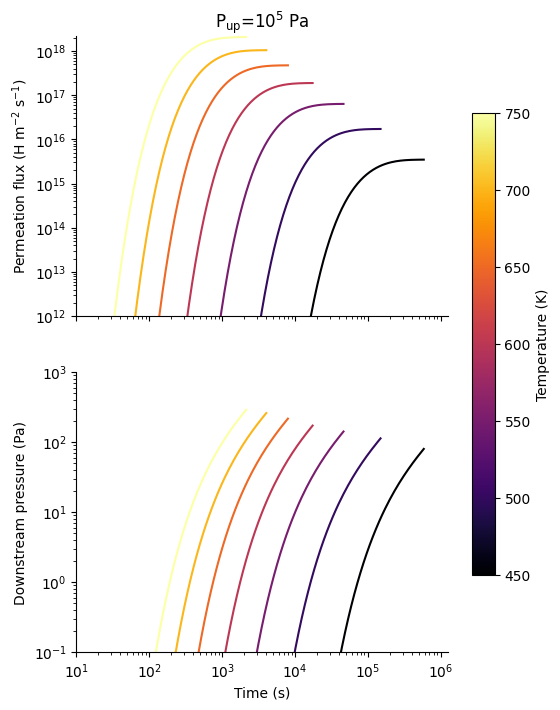

In [3]:

example_P_up = 1e5 # Pa

P_down_data = []
t_data = []
surface_flux_data = []

for T in test_temperature_values:
    run_data = np.genfromtxt(
        f"results/parameter_exploration/P={example_P_up:.2e}/T={T:.0f}/permeation_standard.csv",
        delimiter=",",
        names=True,
    )

    t = run_data["ts"]
    surface_flux = run_data["solute_flux_surface_2_H_m2_s1"] * -1

    time_to_steay_ind = np.where(surface_flux > 0.999 * surface_flux[-1])[0][0]
    t, surface_flux = t[:time_to_steay_ind], surface_flux[:time_to_steay_ind]

    P_down = pressure_from_flux(
        flux=surface_flux,
        t=t,
        T=T,
        sample_diameter=sample_diameter,
        downstream_pipe_diameter=downstream_pipe_diameter,
        downstream_pipe_length=downstream_pipe_length
    )

    P_down_data.append(P_down)
    t_data.append(t)
    surface_flux_data.append(surface_flux)

norm = Normalize(
    vmin=min(test_temperature_values), vmax=max(test_temperature_values)
)
colorbar = cm.inferno
sm = plt.cm.ScalarMappable(cmap=colorbar, norm=norm)
colours = [colorbar(norm(i)) for i in test_temperature_values]

normalised_fluxes = []
for fluxes in surface_flux_data:
    normalised_fluxes.append(fluxes / fluxes[-1])

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(6, 8))

# Plot on the first axis
for colour, flux_values, t_values in zip(colours, surface_flux_data, t_data):
    axs[0].plot(t_values, flux_values, color=colour)
axs[0].set_ylabel(r"Permeation flux (H m$^{-2}$ s$^{-1}$)")
axs[0].set_ylim(bottom=1e12)
axs[0].set_yscale("log")
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[0].set_title(r"P$_{\mathrm{up}}$=10$^{5}$ Pa")

# Plot on the second axis
for colour, P_down, t_values in zip(colours, P_down_data, t_data):
    axs[1].plot(t_values, P_down, color=colour)
axs[1].set_ylabel(r"Downstream pressure (Pa)")
axs[1].set_xlabel(r"Time (s)")
axs[1].set_xscale("log")
axs[1].set_xlim(left=1e1)
axs[1].set_yscale("log")
axs[1].set_ylim(1e-01, 1e3)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

fig.colorbar(sm, label=r"Temperature (K)", ax=axs, shrink=0.75)

plt.savefig("results/figures/downstream pressure varying T.png")


Varying the sample temperature is shown to have a significant influence on the time required to reach a point of steady-state permeation flux, and also has an addional impact on the downstream pressure values. This is expected as the sample temperature affects both the hydorgen transport behaviour within the sample, and the value of the concentration at the upstream surface.

> Note:
>
> The values are cut-off at the point steady state permeation flux is achieved.


The large difference in time to reach steady-state will influence the realistic testing range that can be completed by a GDP rig here at the PSFC. Thus, to investiagte this, the time to steady-state can be comapred against sample temperature: 

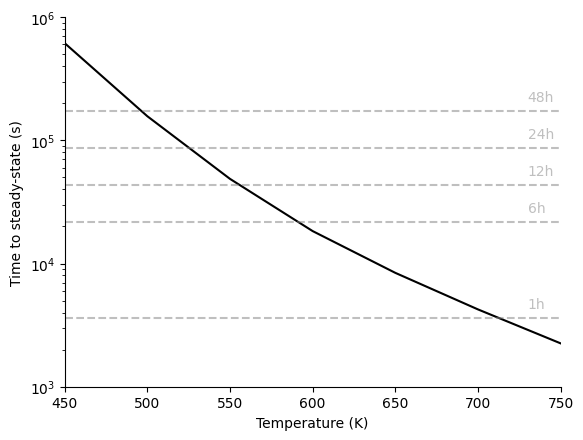

In [4]:
time_to_steady = []

for T in test_temperature_values:
    run_data = np.genfromtxt(
        f"results/parameter_exploration/P={example_P_up:.2e}/T={T:.0f}/permeation_standard.csv",
        delimiter=",",
        names=True,
    )
    t = run_data["ts"]
    surface_flux = run_data["solute_flux_surface_2_H_m2_s1"] * -1
    time_ind = np.where(surface_flux > 0.999 * surface_flux[-1])[0][0]
    time_to_steady.append(t[time_ind])

plt.figure()

plt.plot(test_temperature_values, time_to_steady, color="black")
plt.ylabel(r"Time to steady-state (s)")
plt.xlabel(r"Temperature (K)")
plt.yscale("log")
plt.xlim(450, 750)
plt.ylim(1e3, 1e6)
hour = 3600

for value in [1, 6, 12, 24, 48]:
    plt.hlines(
        y=hour * value,
        xmin=400,
        xmax=750,
        color="grey",
        alpha=0.5,
        linestyle="dashed",
    )
    plt.annotate(f"{value}h", xy=[730, hour * value * 1.2], color="grey", alpha=0.5)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.savefig("results/figures/steady state times.png")


From this it can be seen that sample temperatures below 500K could take more than 48h to reach a point of steady-state, meaning it may not be feasible to run an experiment at such temperatures.

Depending on permitted operating hours, this will guide what temperature range could be tested. However, it should be noted that these are results for Inconel, with other metals with higher hydrogen diffusivity properties, these values could be greatly reduced.

## Varying both upstream pressure and sample temperature

Next, both factors of sample temperature, and upstream pressure can be varied to investigate the coupled factors on the downstream pressure:

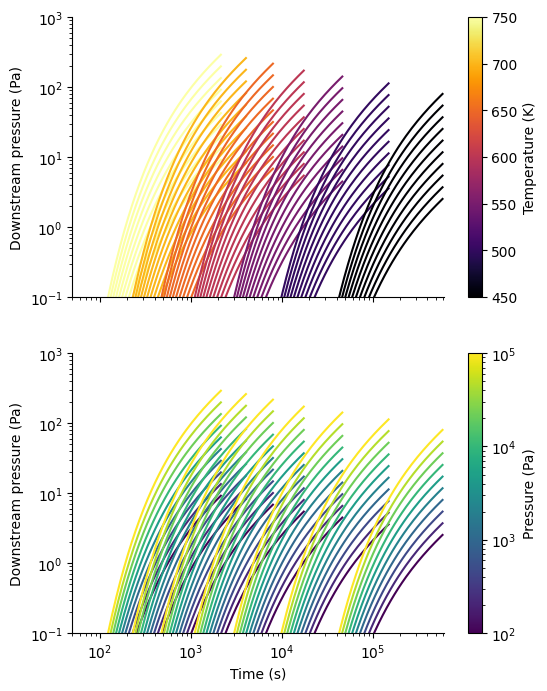

In [5]:
P_down_data = []
t_data = []

for P_up in test_pressure_values:
    P_down_data_per_P_up = []
    t_data_per_pressure = []
    for T in test_temperature_values:
        run_data = np.genfromtxt(
            f"results/parameter_exploration/P={P_up:.2e}/T={T:.0f}/permeation_standard.csv",
            delimiter=",",
            names=True,
        )

        t = run_data["ts"]
        surface_flux = run_data["solute_flux_surface_2_H_m2_s1"] * -1

        time_to_steay_ind = np.where(surface_flux > 0.999 * surface_flux[-1])[0][0]
        t, surface_flux = t[:time_to_steay_ind], surface_flux[:time_to_steay_ind]

        P_down = pressure_from_flux(
            flux=surface_flux,
            t=t,
            T=T,
            sample_diameter=sample_diameter,
            downstream_pipe_diameter=downstream_pipe_diameter,
            downstream_pipe_length=downstream_pipe_length
        )

        P_down_data_per_P_up.append(P_down)
        t_data_per_pressure.append(t)

    P_down_data.append(P_down_data_per_P_up)
    t_data.append(t_data_per_pressure)

norm_T = Normalize(
    vmin=min(test_temperature_values), vmax=max(test_temperature_values)
)
colorbar_T = cm.inferno
sm_T = plt.cm.ScalarMappable(cmap=colorbar_T, norm=norm_T)
colours_T = [colorbar_T(norm_T(T)) for T in test_temperature_values]

norm_P = LogNorm(vmin=min(test_pressure_values), vmax=max(test_pressure_values))
colorbar_P = cm.viridis
sm_P = plt.cm.ScalarMappable(cmap=colorbar_P, norm=norm_P)
colours_P = [colorbar_P(norm_P(P)) for P in test_pressure_values]

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(6, 8))

# Plot on the first axis
for P_down, t_values in zip(P_down_data, t_data):
    for pressure, time, colour in zip(P_down, t_values, colours_T):
        axs[0].plot(time, pressure, color=colour)
axs[0].set_ylabel(r"Downstream pressure (Pa)")
axs[0].set_ylim(1e-01, 1e3)
axs[0].set_xlim(left=5e01)
axs[0].set_yscale("log")
axs[0].set_xscale("log")
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

# Plot on the second axis
for P_down, t_values, colour in zip(P_down_data, t_data, colours_P):
    for pressure, time in zip(P_down, t_values):
        axs[1].plot(time, pressure, color=colour)
axs[1].set_ylabel(r"Downstream pressure (Pa)")
axs[1].set_xlabel(r"Time (s)")
axs[1].set_ylim(1e-01, 1e3)
axs[1].set_xlim(left=5e01)
axs[1].set_yscale("log")
axs[1].set_xscale("log")
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

fig.colorbar(sm_T, label=r"Temperature (K)", ax=axs[0])
fig.colorbar(sm_P, label=r"Pressure (Pa)", ax=axs[1])

plt.savefig("results/figures/downstream pressure varying T and P.png")

This figure, although hectic and busy, corroborates with the previous figures showing that the upstream pressure largely affects th downstream pressure values, where as the temperature mainly influences time to steady-state.

To make it easier to extract information from this data, we can instead just take the final downstream pressure value and plot them against their respective upstream pressure cases, colouring by temperature:

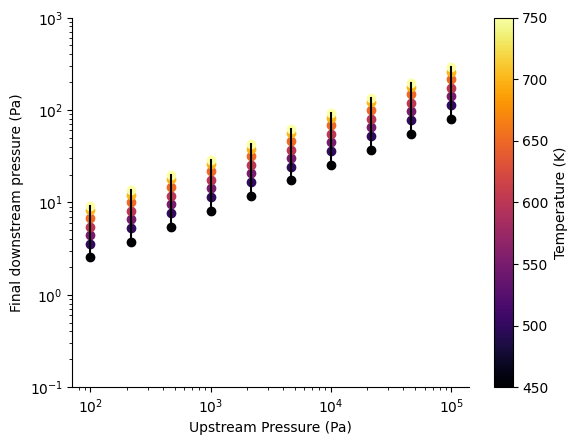

In [6]:
P_down_data = []

for P_up in test_pressure_values:
    P_down_data_per_P_up = []
    for T in test_temperature_values:
        run_data = np.genfromtxt(
            f"results/parameter_exploration/P={P_up:.2e}/T={T:.0f}/permeation_standard.csv",
            delimiter=",",
            names=True,
        )

        t = run_data["ts"]
        surface_flux = run_data["solute_flux_surface_2_H_m2_s1"] * -1

        time_to_steay_ind = np.where(surface_flux > 0.999 * surface_flux[-1])[0][0]
        t, surface_flux = t[:time_to_steay_ind], surface_flux[:time_to_steay_ind]

        P_down = pressure_from_flux(
            flux=surface_flux,
            t=t,
            T=T,
            sample_diameter=sample_diameter,
            downstream_pipe_diameter=downstream_pipe_diameter,
            downstream_pipe_length=downstream_pipe_length
        )

        P_down_data_per_P_up.append(P_down[-1])

    P_down_data.append(P_down_data_per_P_up)

norm = Normalize(
    vmin=min(test_temperature_values), vmax=max(test_temperature_values)
)
colorbar = cm.inferno
sm = plt.cm.ScalarMappable(cmap=colorbar, norm=norm)
colours = [colorbar(norm(i)) for i in test_temperature_values]

plt.figure()
for P_up, P_down in zip(test_pressure_values, P_down_data):
    x = np.ones_like(P_down) * P_up
    plt.plot(x, P_down, color="black")
    for x_value, P_down_value, colour in zip(x, P_down, colours):
        plt.scatter(x_value, P_down_value, color=colour)

plt.xlabel("Upstream Pressure (Pa)")
plt.ylabel("Final downstream pressure (Pa)")
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-01, 1e3)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.colorbar(sm, label=r"Temperature (K)", ax=ax)
plt.savefig("results/figures/final downstream pressure varying T and P.png")


In this figure, the influence of the temperature on the downstream pressure value is most easily observed, and affects values consistently relative to each upstream pressure case.

However, simply taking the range of values for each upstream pressure case, one can then estimate how the downstream pressure values will change with coatings present.

Cases are considered with coatings reducing the permeation flux by factors of 10, 100 and 1000.

Furthermore, the detectable range for a pressure gauge by [MKS (Baratron absolute pressure sensor)](https://www.mks.com/f/626d-absolute-capacitance-manometers). For this case the detectable range for the 1 Torr model will be overlayed on the figure. 

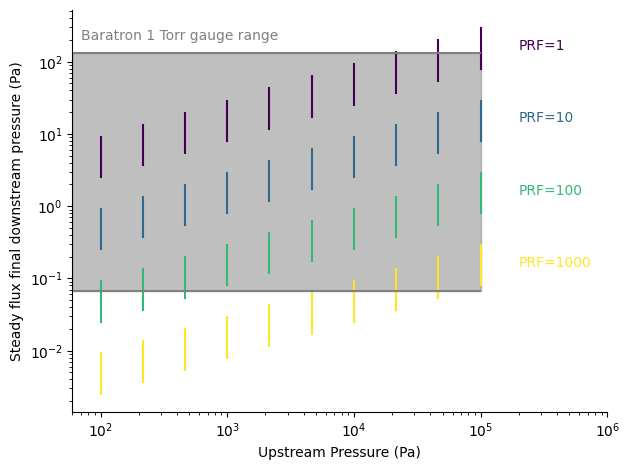

In [7]:
# pressure gauge range 1 Torr
Torr_model = 1

gauge_max = Torr_model * 133.3
# min detectable pressure 0.05% of full scale
gauge_min = 0.0005 * gauge_max

# test PRF values
PRF_values = [1, 10, 100, 1000]


P_down_data = []
for PRF_case in PRF_values:
    P_down_data_per_PRF = []
    for P_up in test_pressure_values:
        P_down_data_per_P_up = []
        for T in test_temperature_values:
            run_data = np.genfromtxt(
                f"results/parameter_exploration/P={P_up:.2e}/T={T:.0f}/permeation_standard.csv",
                delimiter=",",
                names=True,
            )

            t = run_data["ts"]
            surface_flux = run_data["solute_flux_surface_2_H_m2_s1"] * -1

            time_to_steay_ind = np.where(surface_flux > 0.999 * surface_flux[-1])[0][0]
            t, surface_flux = t[:time_to_steay_ind], surface_flux[:time_to_steay_ind]

            P_down = pressure_from_flux(
                flux=surface_flux/PRF_case,
                t=t,
                T=T,
                sample_diameter=sample_diameter,
                downstream_pipe_diameter=downstream_pipe_diameter,
                downstream_pipe_length=downstream_pipe_length
            )
            P_down_data_per_P_up.append(P_down[-1])
        P_down_data_per_PRF.append(P_down_data_per_P_up)
    P_down_data.append(P_down_data_per_PRF)

norm = LogNorm(vmin=min(PRF_values), vmax=max(PRF_values))
colorbar = cm.viridis
colours = [colorbar(norm(i)) for i in PRF_values]

x_values = np.geomspace(6e1, 1e5, num=100)

plt.figure()

for colour, data in zip(colours, P_down_data):
    for P_up, P_down in zip(test_pressure_values, data):
        x = np.ones_like(P_down) * P_up
        plt.plot(x, P_down, color=colour)
    plt.annotate(
        f"PRF={PRF_values[colours.index(colour)]}",
        xy=(2e5, data[-1][-1] * 0.5),
        color=colour,
    )

plt.fill_between(x_values, gauge_min, gauge_max, color="grey", alpha=0.5)
plt.hlines(gauge_min, xmin=x_values[0], xmax=x_values[-1], color="grey")
plt.hlines(gauge_max, xmin=x_values[0], xmax=x_values[-1], color="grey")
plt.annotate(
    f"Baratron {Torr_model} Torr gauge range",
    xy=(x_values[2], gauge_max * 1.5),
    color="grey",
    ha="left",
)

plt.xlabel("Upstream Pressure (Pa)")
plt.ylabel("Steady flux final downstream pressure (Pa)")
plt.xscale("log")
plt.yscale("log")
plt.xlim(6e1, 1e6)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("results/figures/detectable pressure range.png")

From this plot it can be determined that this particular model of pressure gauge could be appropriate for not only initail testing of permeation through an Inconel substrate, but also certain permeation barriers too.

However it should be considered that the manufacturer advises that the most sensive pressure measurements are at the lowest levels of detection. Something to consider when selecting a gauge.

![626D 0 1-1000 Torr capacitence manometer measurement](https://github.com/user-attachments/assets/7f5e3369-7aff-4960-9ff0-50d23a0cabfe)

## Rapid evaluation tool

Although evaluating the pressure rise from every case varying pressure and temperature will give the most detailed view of their influence on downtream pressure. From the results obtained it is apparant a simpler more efficient process can be undertaken to obtain the same results. 

For instance it can be observed that for a given temperature, say 450K, the downstream pressure evolves linearly with upstream pressure in a log-log scale. Thus likely follows a power law, this can be investigated:

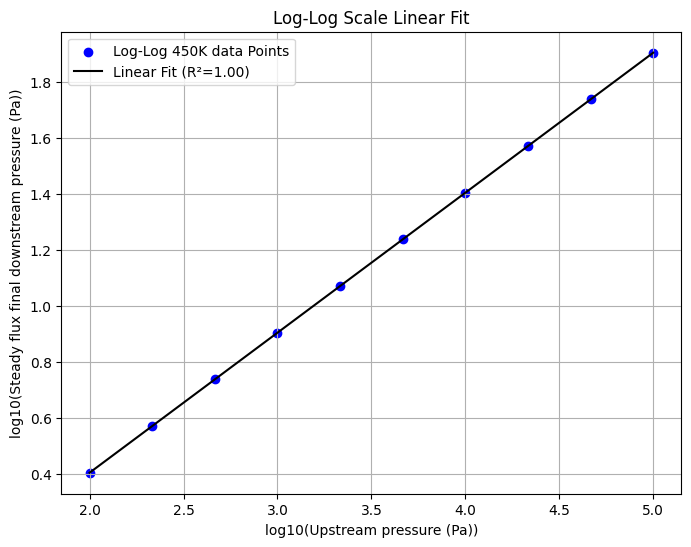

Downtream pressure =  2.53e-01 x Upstream pressure ^ 0.5


In [8]:
from sklearn.linear_model import LinearRegression

example_T = 450 # K

P_down_data_450K = []
for P_up in test_pressure_values:
    run_data = np.genfromtxt(
        f"results/parameter_exploration/P={P_up:.2e}/T={example_T:.0f}/permeation_standard.csv",
        delimiter=",",
        names=True,
    )

    t = run_data["ts"]
    surface_flux = run_data["solute_flux_surface_2_H_m2_s1"] * -1

    time_to_steay_ind = np.where(surface_flux > 0.999 * surface_flux[-1])[0][0]
    t, surface_flux = t[:time_to_steay_ind], surface_flux[:time_to_steay_ind]

    P_down = pressure_from_flux(
        flux=surface_flux,
        t=t,
        T=example_T,
        sample_diameter=sample_diameter,
        downstream_pipe_diameter=downstream_pipe_diameter,
        downstream_pipe_length=downstream_pipe_length
    )
    P_down_data_450K.append(P_down[-1])

# Log transformation
log_x = np.log10(test_pressure_values)
log_y = np.log10(P_down_data_450K)

# Linear regression on log-log scale
model = LinearRegression()
log_x_reshaped = log_x.reshape(-1, 1)  # Reshape for sklearn
model.fit(log_x_reshaped, log_y)
log_y_pred = model.predict(log_x_reshaped)
r2_log = model.score(log_x_reshaped, log_y)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(log_x, log_y, label="Log-Log 450K data Points", color="blue")
plt.plot(log_x, log_y_pred, label=f"Linear Fit (R²={r2_log:.2f})", color="black")
plt.ylabel("log10(Steady flux final downstream pressure (Pa))")
plt.xlabel("log10(Upstream pressure (Pa))")
plt.title("Log-Log Scale Linear Fit")
plt.legend()
plt.grid()
plt.show()

plt.savefig("results/figures/log-log fit.png")

# Interpret the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
power_law_a = 10 ** intercept

print(f"Downtream pressure =  {power_law_a:.2e} x Upstream pressure ^ {slope:.1f}")

As can be seen, the downstream pressure follows a power law with upstream pressure wiith a perfect linea fit, thus instead of modelling every case, simply the minimum and maximum pressure cases can be considered and fit inbetween.

Furthermore, the range of downtream pressures remains constant relative to each case of upstream pressure. Therefore, only the minimum and maximum temperatures need be considered.

Thus, only 4 simluations need to be run to extract the same information as previously, allowing for rapid testing to evaulate which pressure gauge is most appropriate for testing gievn a set of parameters:

Testing case P=1.00e+02, T=450
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+07 s    Elapsed time so far: 4.8 s
Testing case P=1.00e+02, T=750
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+07 s    Elapsed time so far: 3.8 s
Testing case P=1.00e+05, T=450
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+07 s    Elapsed time so far: 8.9 s
Testing case P=1.00e+05, T=750
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+07 s    Elapsed time so far: 5.0 s


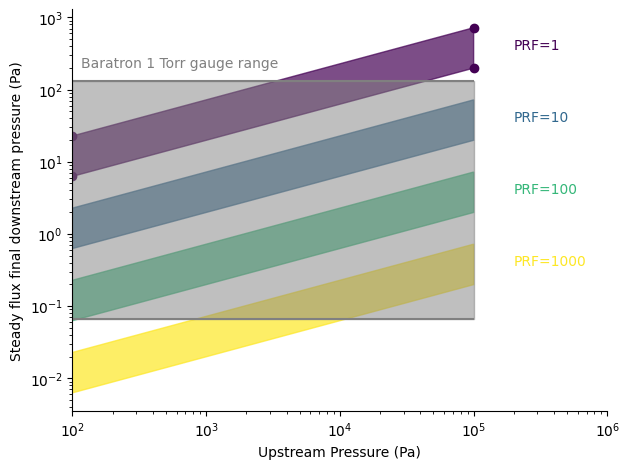

In [ ]:
from festim_scripts import test_gauge_range_parameters
import pint

ureg = pint.UnitRegistry()

pipe_diameter_i = (1/8) * ureg.inch
pipe_diameter_m = pipe_diameter_i.to(ureg.meter).magnitude


test_gauge_range_parameters(
    sample_diameter=20e-03, # m
    sample_thickness=1e-03, # m
    downstream_pipe_diameter=pipe_diameter_m, # m
    downstream_pipe_length=2, # m
    steady_state_point=0.999,
    sample_temperature_max_min=[450, 750], # K
    upstream_pressure_max_min=[1e2, 1e5], # Pa
    PRF_values=[1, 10, 100, 1000],
    gauge_model=1, # Torr
)

plt.savefig("results/figures/detectable pressure range testing.png")
